# EDA Part - 1 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats 

In [18]:
df = sns.load_dataset('titanic')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [20]:
df['age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [21]:
df.nunique()


survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

In [22]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [23]:
df['sibsp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

<Axes: xlabel='age', ylabel='Count'>

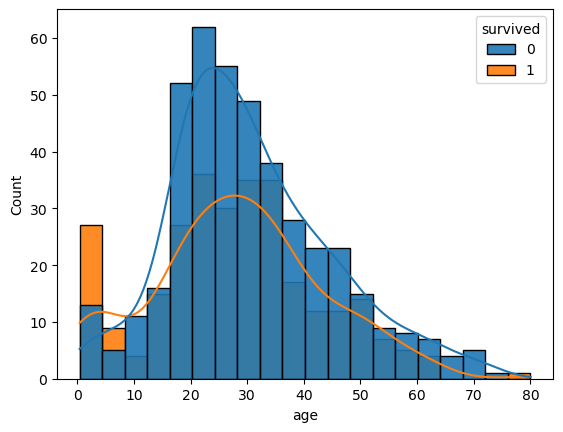

In [30]:
sns.histplot(data=df, x='age', kde=True,hue='survived',alpha=0.9)

In [37]:
stats.shapiro(df.age)

ShapiroResult(statistic=nan, pvalue=nan)

<Axes: xlabel='fare', ylabel='Count'>

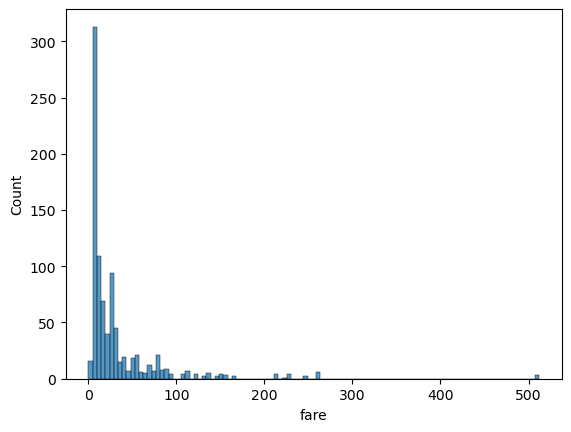

In [33]:
sns.histplot(data=df,x='fare')

In [34]:
stats.shapiro(df['fare'])

ShapiroResult(statistic=0.5218913010396559, pvalue=1.0840444395829658e-43)

<Axes: xlabel='class', ylabel='fare'>

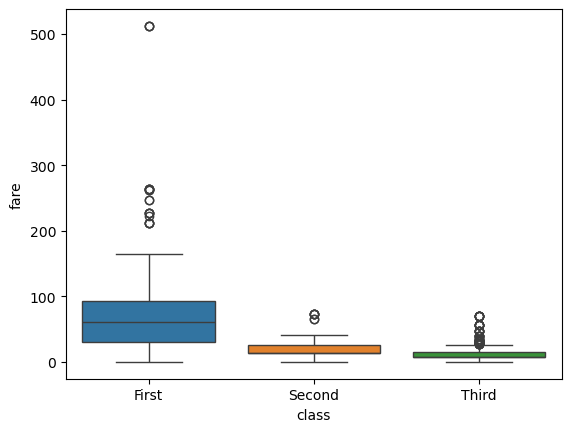

In [42]:
sns.boxplot(df,x='class',y='fare',hue='class')

In [50]:
df['class']

0       Third
1       First
2       Third
3       First
4       Third
        ...  
886    Second
887     First
888     Third
889     First
890     Third
Name: class, Length: 891, dtype: category
Categories (3, object): ['First', 'Second', 'Third']

In [67]:
# How to select first class of class column ?
df_second = df[df['class']=='Second']

In [ ]:
stats.shapiro(df['fare'])

ShapiroResult(statistic=0.7785055068881875, pvalue=2.1134411017545675e-15)

In [72]:
df_First = df[df['class']=='First']

In [82]:
# IQR 
Q1 = df_First['fare'].quantile(0.25)
Q3 = df_First['fare'].quantile(0.75)

IQR = Q3-Q1 
IQR
upper_bound = Q3+1.5*IQR
lower_bound = Q1-1.5*IQR

df_Outlier_Removed=df_First[(df_First['fare']>lower_bound)&(df_First['fare']<upper_bound)]
df_Outlier_Removed.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
23,1,1,male,28.0,0,0,35.5000,S,First,man,True,A,Southampton,yes,True


<Axes: xlabel='fare', ylabel='Count'>

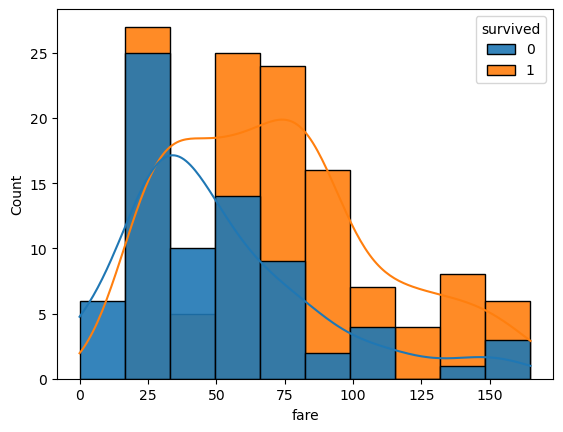

In [83]:
sns.histplot(data=df_Outlier_Removed,x='fare',kde=True,hue='survived',alpha=0.9)

In [84]:
stats.shapiro(df_Outlier_Removed['fare'])

ShapiroResult(statistic=0.9243669055626075, pvalue=1.6046327508760568e-08)

# Convert fare Dataset to normal (log transform)

ShapiroResult(statistic=nan, pvalue=nan)


d:\CONDA\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='fare', ylabel='Count'>

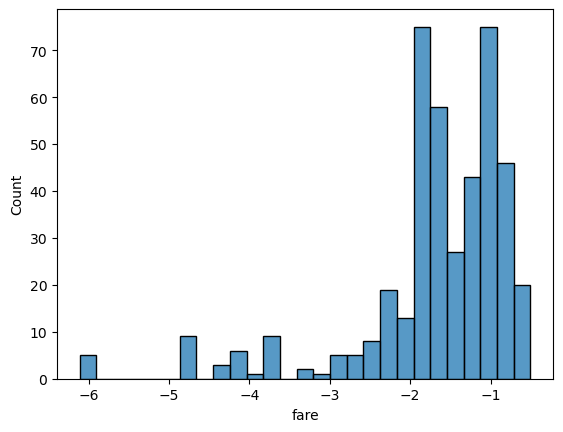

In [96]:
# subset 
df['fare'] = np.log(df['fare'])
df.head()
print(stats.shapiro(df['fare']));
sns.histplot(x=df['fare'],data=df)
# method
# 1. using loc method
# df.loc[df['class']=='First','fare']
# 2. using query method
# df.query(class=="First")['fare']
# code 
 
# make plot 

# normal distribution test 

In [106]:
print(df['fare'].isna().sum())  # Count NaN values
print(np.isinf(df['fare']).sum())  # Count infinite values

891
0


In [113]:
df = sns.load_dataset('titanic')
# Replace 0 with a tiny positive value (e.g., 1e-10)
df['fare'] = df['fare'].replace(0, 1e-10)

# Now apply log transform
df['fare_log'] = np.log(df['fare'])
stats.shapiro(df['fare'])

ShapiroResult(statistic=0.5218913010395565, pvalue=1.0840444395752389e-43)

In [108]:
df['fare']# Count NaN values

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
886   NaN
887   NaN
888   NaN
889   NaN
890   NaN
Name: fare, Length: 891, dtype: float64